In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/coffee-taste-test/coffee_survey.csv


In [2]:
df = pd.read_csv('/kaggle/input/coffee-taste-test/coffee_survey.csv')
df.head()

submission_id              age cups where_drink  \
0        gMR29l  18-24 years old  NaN         NaN   
1        BkPN0e  25-34 years old  NaN         NaN   
2        W5G8jj  25-34 years old  NaN         NaN   
3        4xWgGr  35-44 years old  NaN         NaN   
4        QD27Q8  25-34 years old  NaN         NaN   

                                          brew brew_other purchase  \
0                                          NaN        NaN      NaN   
1  Pod/capsule machine (e.g. Keurig/Nespresso)        NaN      NaN   
2                          Bean-to-cup machine        NaN      NaN   
3     Coffee brewing machine (e.g. Mr. Coffee)        NaN      NaN   
4                                    Pour over        NaN      NaN   

  purchase_other             favorite favorite_specify  ... spent_equipment  \
0            NaN  Regular drip coffee              NaN  ...             NaN   
1            NaN          Iced coffee              NaN  ...             NaN   
2            NaN  Regular drip coffee              NaN  ...             NaN   
3            NaN          Iced coffee              NaN  ...             NaN   
4            NaN                Latte              NaN  ...             NaN   

  value_equipment gender gender_specify education_level ethnicity_race  \
0             NaN    NaN            NaN             NaN            NaN   
1             NaN    NaN            NaN             NaN            NaN   
2             NaN    NaN            NaN             NaN            NaN   
3             NaN    NaN            NaN             NaN            NaN   
4             NaN    NaN            NaN             NaN            NaN   

  ethnicity_race_specify employment_status  number_children  \
0                    NaN               NaN              NaN   
1                    NaN               NaN              NaN   
2                    NaN               NaN              NaN   
3                    NaN               NaN              NaN   
4                    NaN               NaN              NaN   

   political_affiliation  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 57 columns]

In [3]:
df.tail()

submission_id              age cups  \
4037        PA44VP    >65 years old    2   
4038        vNgpPD    >65 years old    2   
4039        g5ggRM  18-24 years old    1   
4040        rlgbDN  25-34 years old    2   
4041        0EGYe9  25-34 years old    1   

                                       where_drink  \
4037                                       At home   
4038                                       At home   
4039  At a cafe, At home, On the go, At the office   
4040                                       At home   
4041                                       At home   

                                                   brew brew_other  \
4037           Coffee brewing machine (e.g. Mr. Coffee)        NaN   
4038           Coffee brewing machine (e.g. Mr. Coffee)        NaN   
4039  Espresso, Pod/capsule machine (e.g. Keurig/Nes...  Aeropress   
4040                                          Pour over        NaN   
4041           Pour over, French press, Espresso, Other  Aeropress   

                                               purchase purchase_other  \
4037                                                NaN            NaN   
4038                                                NaN            NaN   
4039  National chain (e.g. Starbucks, Dunkin), Drive...            NaN   
4040                                                NaN            NaN   
4041                                                NaN            NaN   

                 favorite favorite_specify  ... spent_equipment  \
4037  Regular drip coffee              NaN  ...   Less than $20   
4038  Regular drip coffee              NaN  ...   Less than $20   
4039                Latte              NaN  ...       $300-$500   
4040          Iced coffee              NaN  ...       $100-$300   
4041                Latte              NaN  ...      $500-$1000   

     value_equipment  gender gender_specify  \
4037             Yes  Female            NaN   
4038             Yes    Male            NaN   
4039             Yes    Male            NaN   
4040             Yes    Male            NaN   
4041             Yes  Female            NaN   

                         education_level   ethnicity_race  \
4037                     Master's degree  White/Caucasian   
4038                   Bachelor's degree  White/Caucasian   
4039  Some college or associate's degree  White/Caucasian   
4040                   Bachelor's degree  White/Caucasian   
4041    Doctorate or professional degree  White/Caucasian   

     ethnicity_race_specify   employment_status  number_children  \
4037                    NaN             Retired                2   
4038                    NaN             Retired                2   
4039                    NaN  Employed full-time              NaN   
4040                    NaN          Unemployed              NaN   
4041                    NaN  Employed full-time                1   

      political_affiliation  
4037               Democrat  
4038             Republican  
4039               Democrat  
4040               Democrat  
4041               Democrat  

[5 rows x 57 columns]

In [4]:
df.shape

(4042, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

In [6]:
df.nunique()

submission_id                   4042
age                                7
cups                               6
where_drink                       65
brew                             449
brew_other                       160
purchase                          89
purchase_other                    26
favorite                          12
favorite_specify                  77
additions                         53
additions_other                   42
dairy                            175
sweetener                         82
style                             12
strength                           5
roast_level                        7
caffeine                           3
expertise                         10
coffee_a_bitterness                5
coffee_a_acidity                   5
coffee_a_personal_preference       5
coffee_a_notes                  2317
coffee_b_bitterness                5
coffee_b_acidity                   5
coffee_b_personal_preference       5
coffee_b_notes                  2197
c

In [7]:
df.describe()

expertise  coffee_a_bitterness  coffee_a_acidity  \
count  3938.000000          3798.000000       3779.000000   
mean      5.693499             2.141127          3.634824   
std       1.948867             0.947163          0.982113   
min       1.000000             1.000000          1.000000   
25%       5.000000             1.000000          3.000000   
50%       6.000000             2.000000          4.000000   
75%       7.000000             3.000000          4.000000   
max      10.000000             5.000000          5.000000   

       coffee_a_personal_preference  coffee_b_bitterness  coffee_b_acidity  \
count                   3789.000000          3780.000000       3767.000000   
mean                       3.310900             3.013228          2.223786   
std                        1.185953             0.992875          0.865389   
min                        1.000000             1.000000          1.000000   
25%                        2.000000             2.000000          2.000000   
50%                        3.000000             3.000000          2.000000   
75%                        4.000000             4.000000          3.000000   
max                        5.000000             5.000000          5.000000   

       coffee_b_personal_preference  coffee_c_bitterness  coffee_c_acidity  \
count                   3773.000000          3764.000000       3751.000000   
mean                       3.068646             3.071998          2.366836   
std                        1.113546             0.999267          0.921048   
min                        1.000000             1.000000          1.000000   
25%                        2.000000             2.000000          2.000000   
50%                        3.000000             3.000000          2.000000   
75%                        4.000000             4.000000          3.000000   
max                        5.000000             5.000000          5.000000   

       coffee_c_personal_preference  coffee_d_bitterness  coffee_d_acidity  \
count                   3766.000000          3767.000000       3765.000000   
mean                       3.064790             2.162729          3.858167   
std                        1.128431             1.081546          1.007973   
min                        1.000000             1.000000          1.000000   
25%                        2.000000             1.000000          3.000000   
50%                        3.000000             2.000000          4.000000   
75%                        4.000000             3.000000          5.000000   
max                        5.000000             5.000000          5.000000   

       coffee_d_personal_preference  
count                   3764.000000  
mean                       3.375930  
std                        1.452504  
min                        1.000000  
25%                        2.000000  
50%                        4.000000  
75%                        5.000000  
max                        5.000000

In [8]:
df.describe(include=['object'])

submission_id              age  cups where_drink       brew brew_other  \
count           4042             4011  3949        3972       3657        678   
unique          4042                7     6          65        449        160   
top           gMR29l  25-34 years old     2     At home  Pour over  Aeropress   
freq               1             1986  1663        1625        575        335   

                     purchase purchase_other  favorite favorite_specify  ...  \
count                     710             31      3980              114  ...   
unique                     89             26        12               77  ...   
top     Specialty coffee shop       Cometeer  Pourover       Flat White  ...   
freq                      116              2      1084                9  ...   

         spent_equipment value_equipment gender      gender_specify  \
count               3506            3494   3523                  12   
unique                 7               2      5                  11   
top     More than $1,000             Yes   Male  Transgender Female   
freq                 780            3318   2524                   2   

          education_level   ethnicity_race ethnicity_race_specify  \
count                3438             3418                    105   
unique                  6                6                     82   
top     Bachelor's degree  White/Caucasian                  Mixed   
freq                 1759             2626                      7   

         employment_status number_children political_affiliation  
count                 3419             856                  3289  
unique                   6               4                     4  
top     Employed full-time               2              Democrat  
freq                  2708             402                  1768  

[4 rows x 44 columns]

In [9]:
df.describe(include='all')

submission_id              age  cups where_drink       brew brew_other  \
count           4042             4011  3949        3972       3657        678   
unique          4042                7     6          65        449        160   
top           gMR29l  25-34 years old     2     At home  Pour over  Aeropress   
freq               1             1986  1663        1625        575        335   
mean             NaN              NaN   NaN         NaN        NaN        NaN   
std              NaN              NaN   NaN         NaN        NaN        NaN   
min              NaN              NaN   NaN         NaN        NaN        NaN   
25%              NaN              NaN   NaN         NaN        NaN        NaN   
50%              NaN              NaN   NaN         NaN        NaN        NaN   
75%              NaN              NaN   NaN         NaN        NaN        NaN   
max              NaN              NaN   NaN         NaN        NaN        NaN   

                     purchase purchase_other  favorite favorite_specify  ...  \
count                     710             31      3980              114  ...   
unique                     89             26        12               77  ...   
top     Specialty coffee shop       Cometeer  Pourover       Flat White  ...   
freq                      116              2      1084                9  ...   
mean                      NaN            NaN       NaN              NaN  ...   
std                       NaN            NaN       NaN              NaN  ...   
min                       NaN            NaN       NaN              NaN  ...   
25%                       NaN            NaN       NaN              NaN  ...   
50%                       NaN            NaN       NaN              NaN  ...   
75%                       NaN            NaN       NaN              NaN  ...   
max                       NaN            NaN       NaN              NaN  ...   

         spent_equipment value_equipment gender      gender_specify  \
count               3506            3494   3523                  12   
unique                 7               2      5                  11   
top     More than $1,000             Yes   Male  Transgender Female   
freq                 780            3318   2524                   2   
mean                 NaN             NaN    NaN                 NaN   
std                  NaN             NaN    NaN                 NaN   
min                  NaN             NaN    NaN                 NaN   
25%                  NaN             NaN    NaN                 NaN   
50%                  NaN             NaN    NaN                 NaN   
75%                  NaN             NaN    NaN                 NaN   
max                  NaN             NaN    NaN                 NaN   

          education_level   ethnicity_race ethnicity_race_specify  \
count                3438             3418                    105   
unique                  6                6                     82   
top     Bachelor's degree  White/Caucasian                  Mixed   
freq                 1759             2626                      7   
mean                  NaN              NaN                    NaN   
std                   NaN              NaN                    NaN   
min                   NaN              NaN                    NaN   
25%                   NaN              NaN                    NaN   
50%                   NaN              NaN                    NaN   
75%                   NaN              NaN                    NaN   
max                   NaN              NaN                    NaN   

         employment_status  number_children  political_affiliation  
count                 3419              856                   3289  
unique                   6                4                      4  
top     Employed full-time                2               Democrat  
freq                  2708              402                   1768  
mean                   NaN              NaN   

In [10]:
df.isnull().sum()

submission_id                      0
age                               31
cups                              93
where_drink                       70
brew                             385
brew_other                      3364
purchase                        3332
purchase_other                  4011
favorite                          62
favorite_specify                3928
additions                         83
additions_other                 3994
dairy                           2356
sweetener                       3530
style                             84
strength                         126
roast_level                      102
caffeine                         125
expertise                        104
coffee_a_bitterness              244
coffee_a_acidity                 263
coffee_a_personal_preference     253
coffee_a_notes                  1464
coffee_b_bitterness              262
coffee_b_acidity                 275
coffee_b_personal_preference     269
coffee_b_notes                  1588
c

In [11]:
df.duplicated().sum()

0

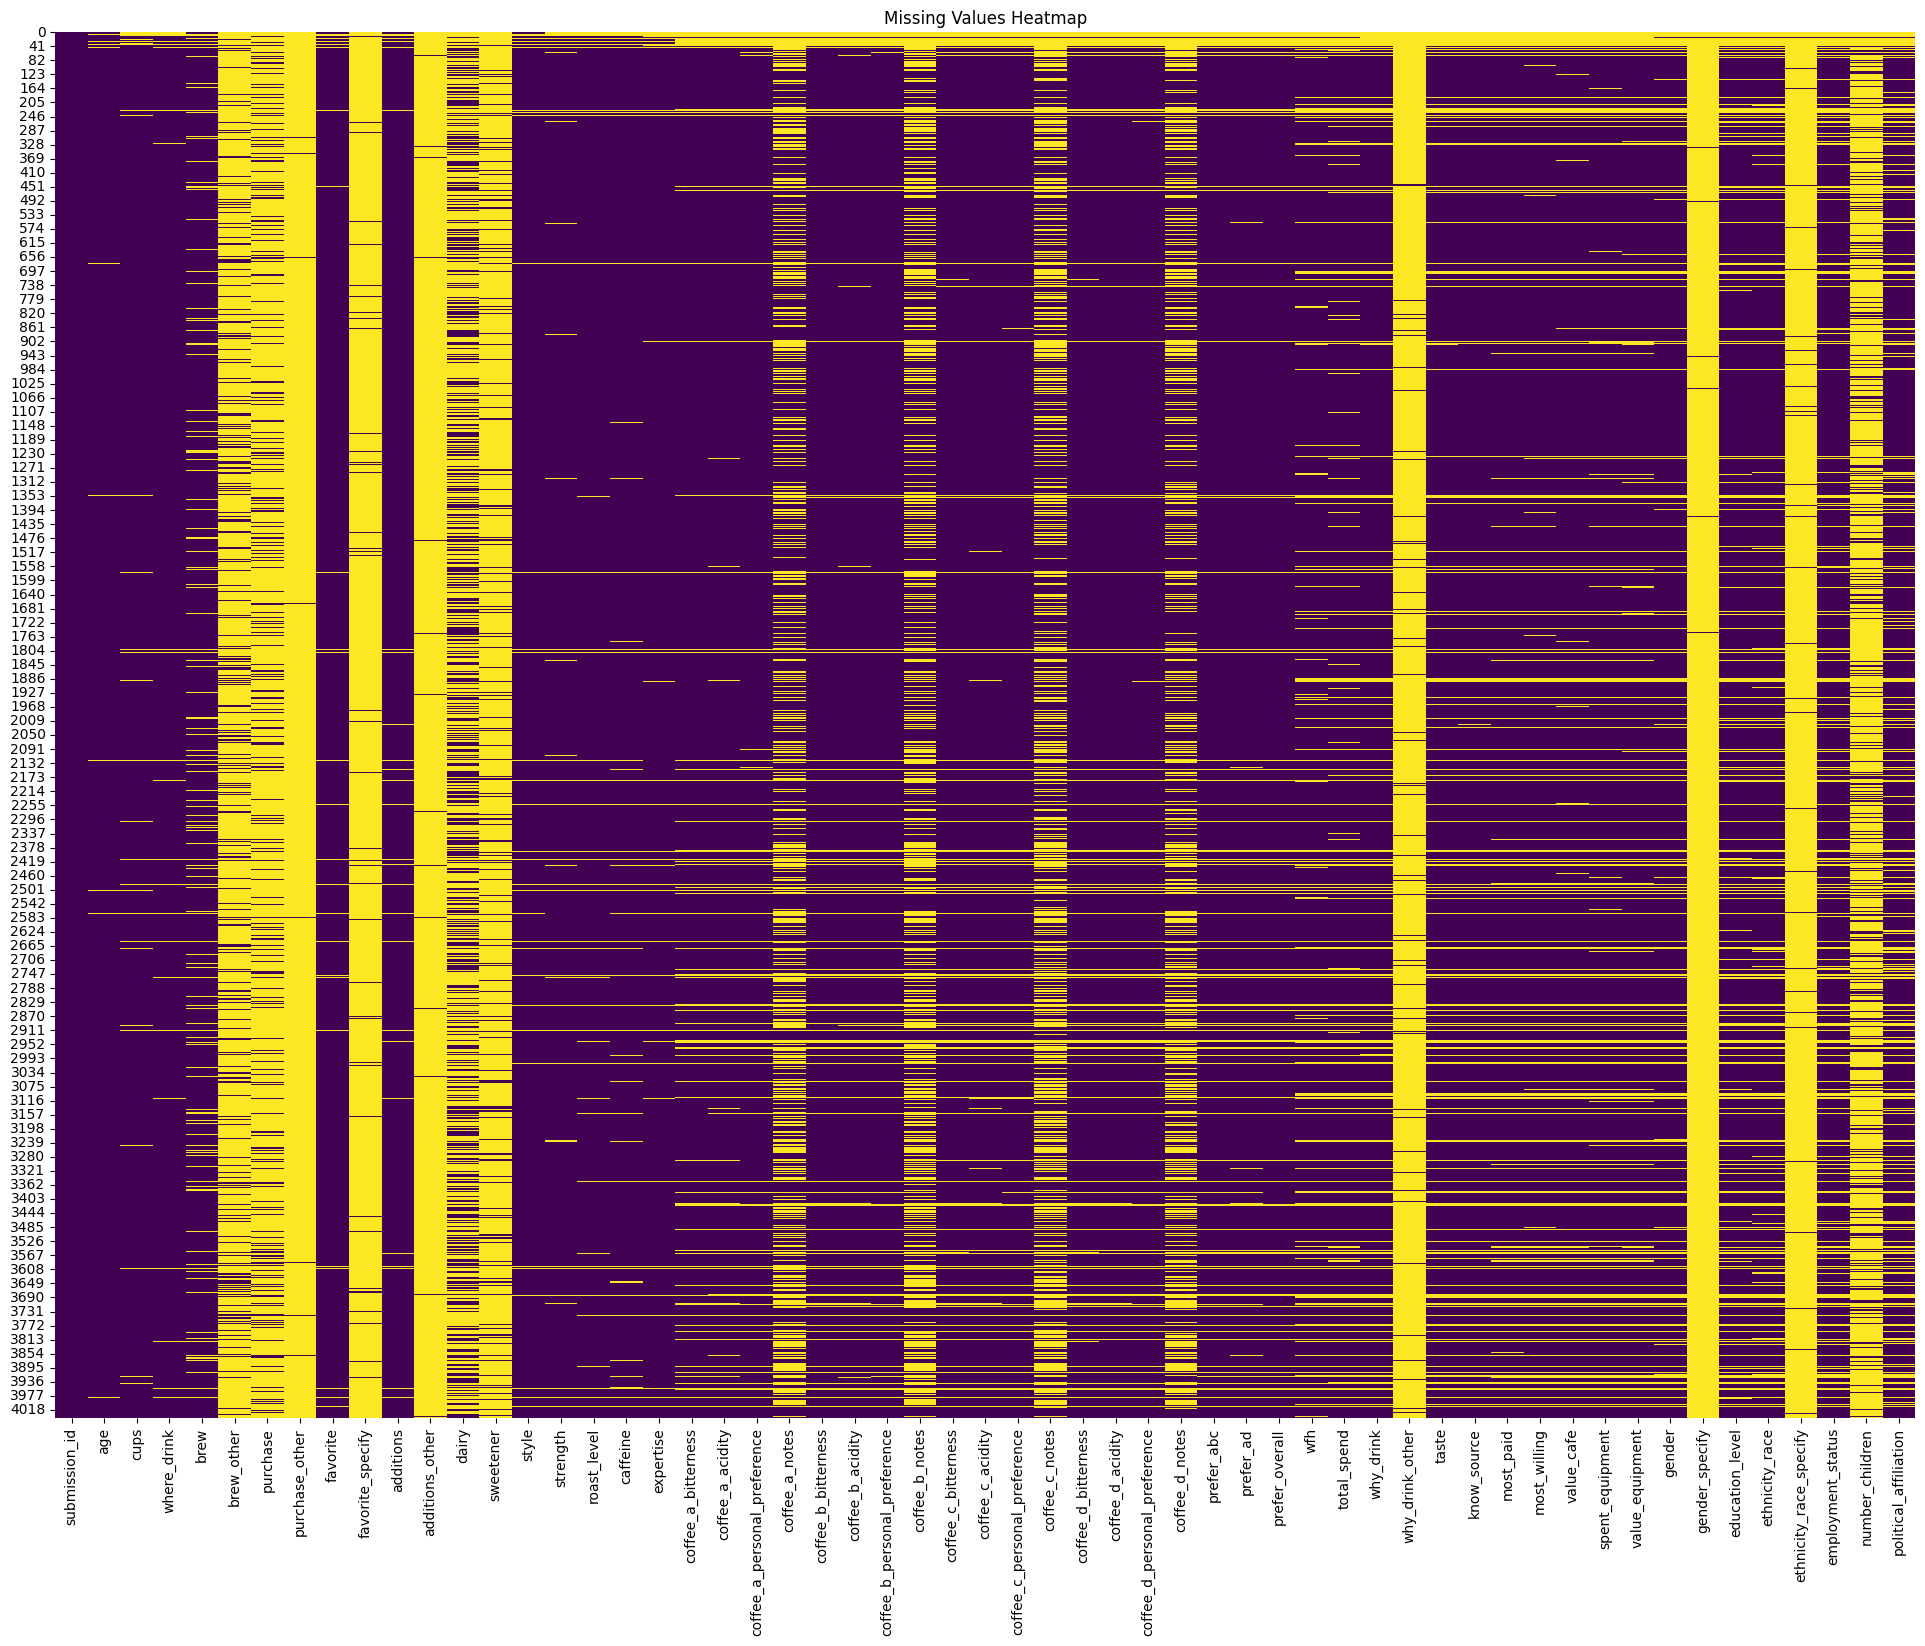

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 18))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


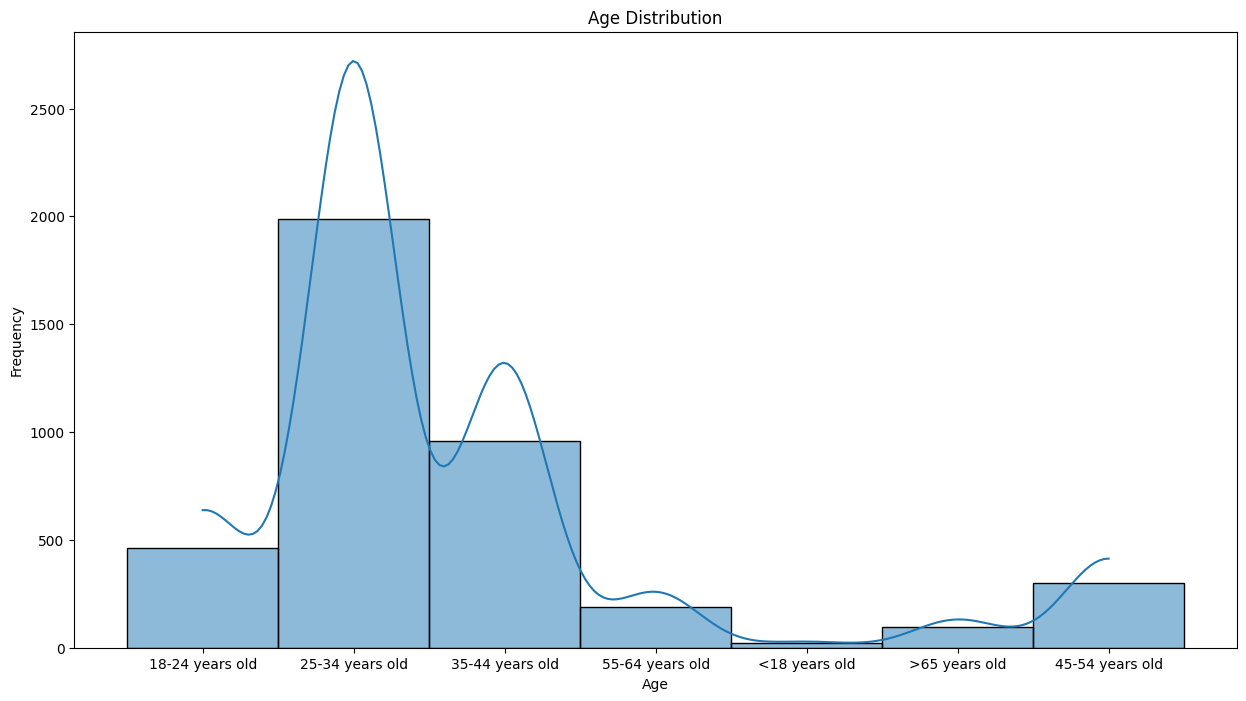

In [13]:
plt.figure(figsize=(15, 8))
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


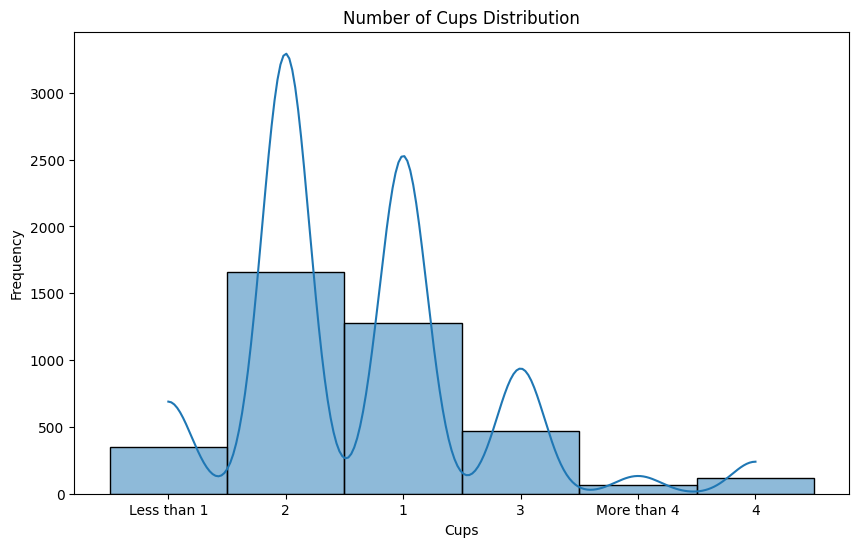

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cups'].dropna(), kde=True)
plt.title('Number of Cups Distribution')
plt.xlabel('Cups')
plt.ylabel('Frequency')
plt.show()

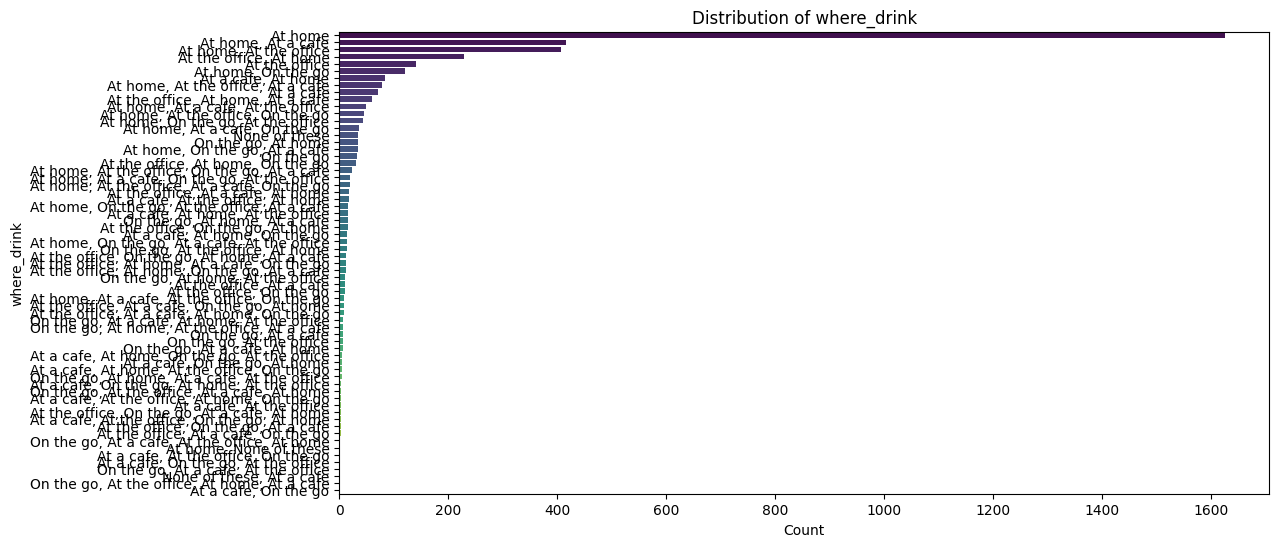

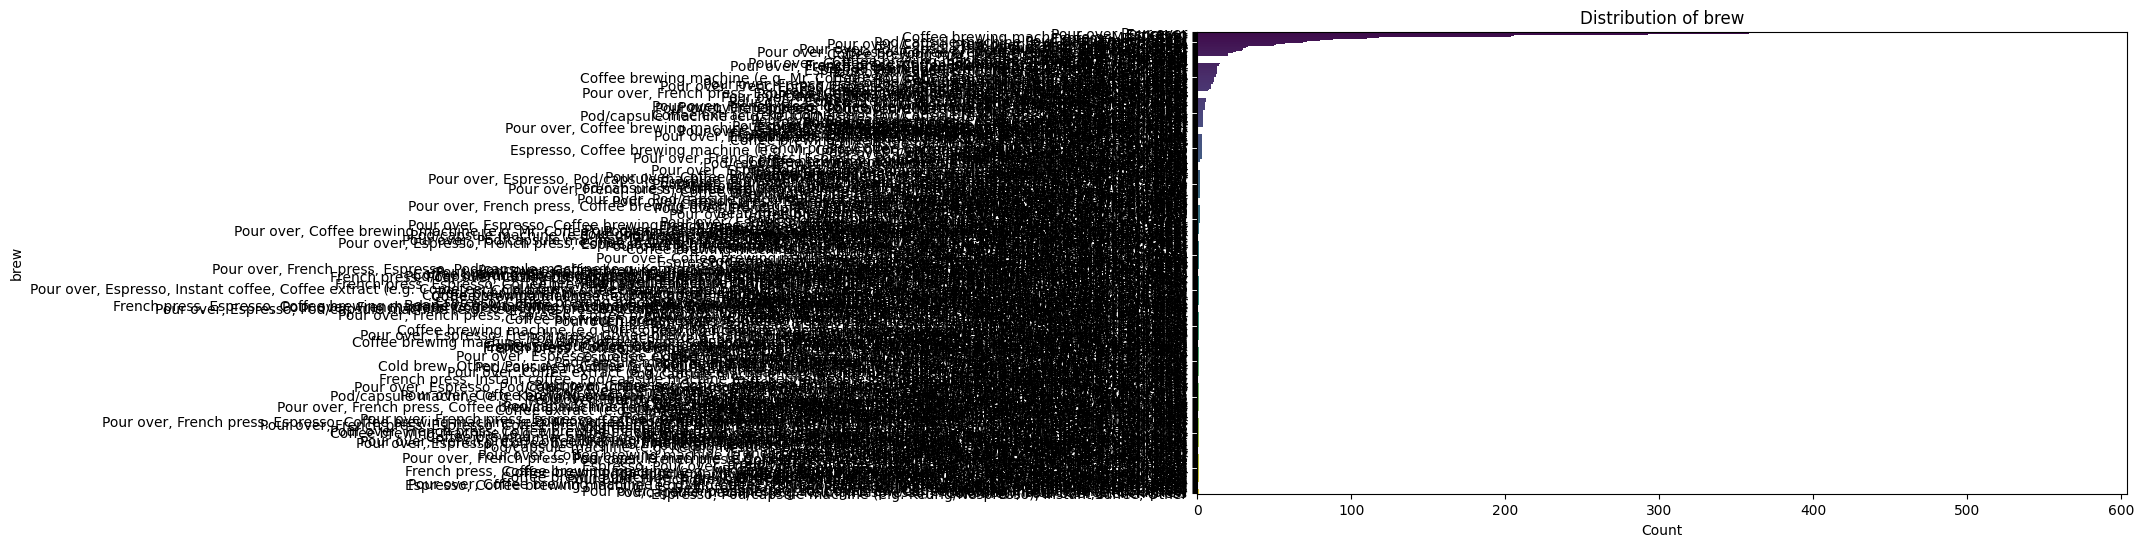

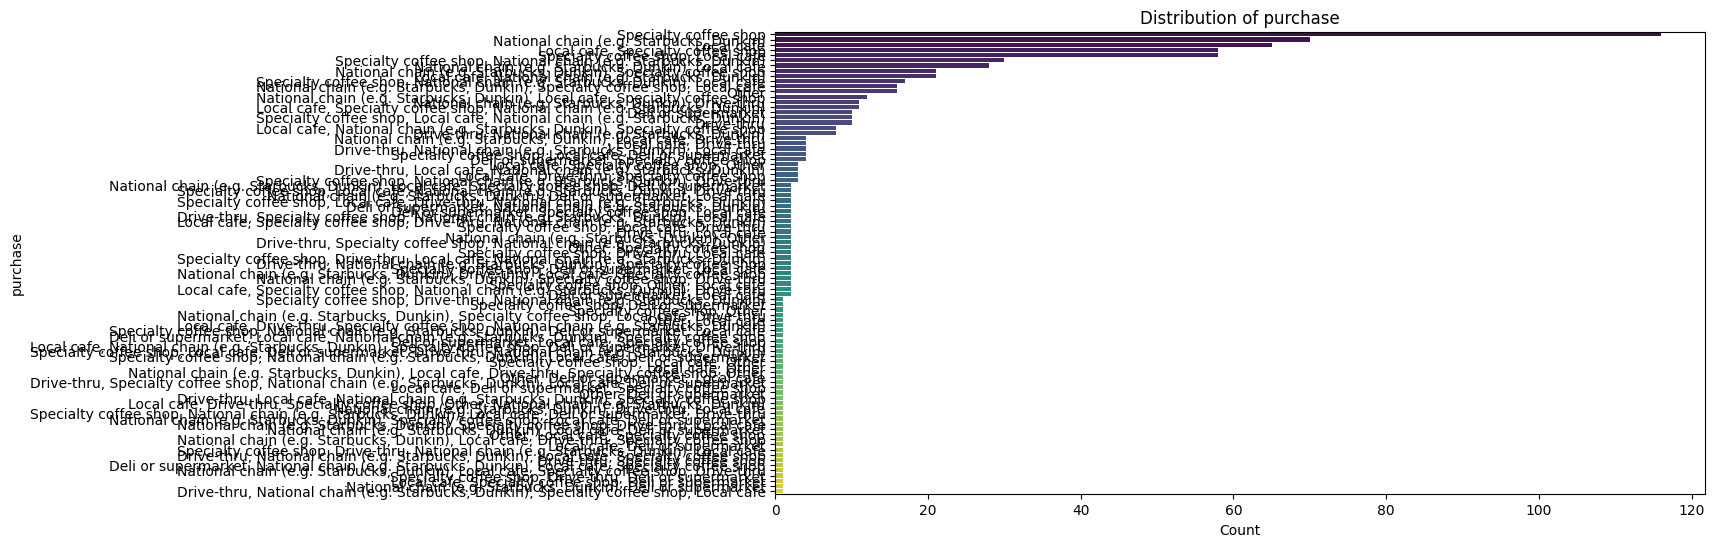

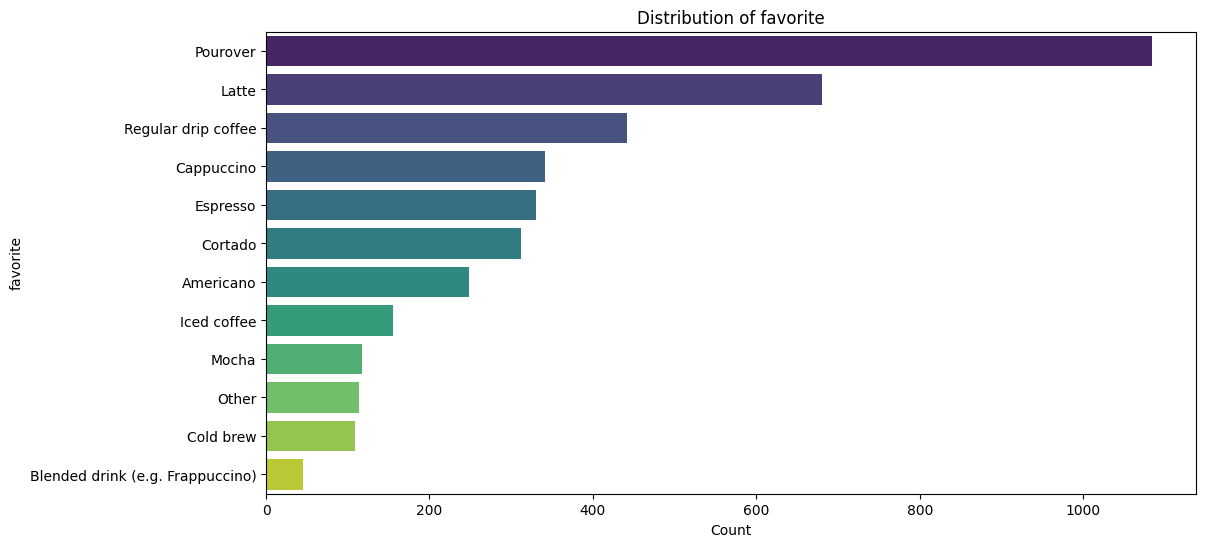

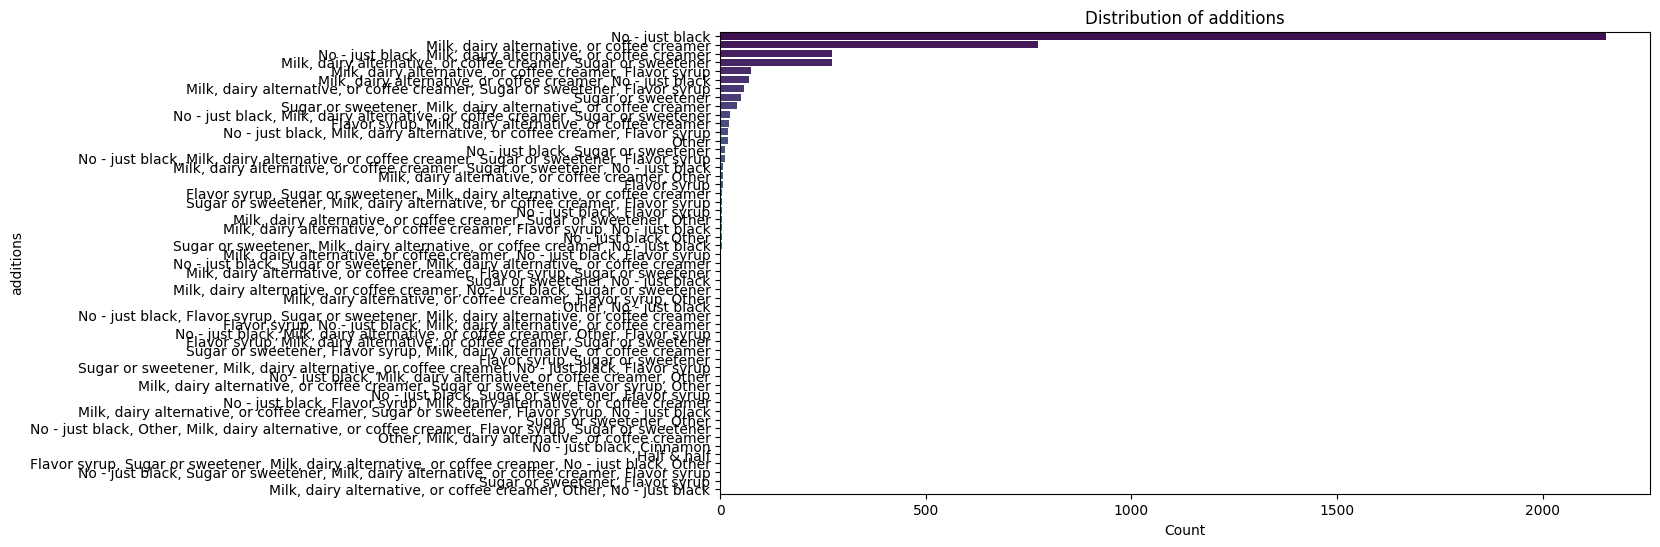

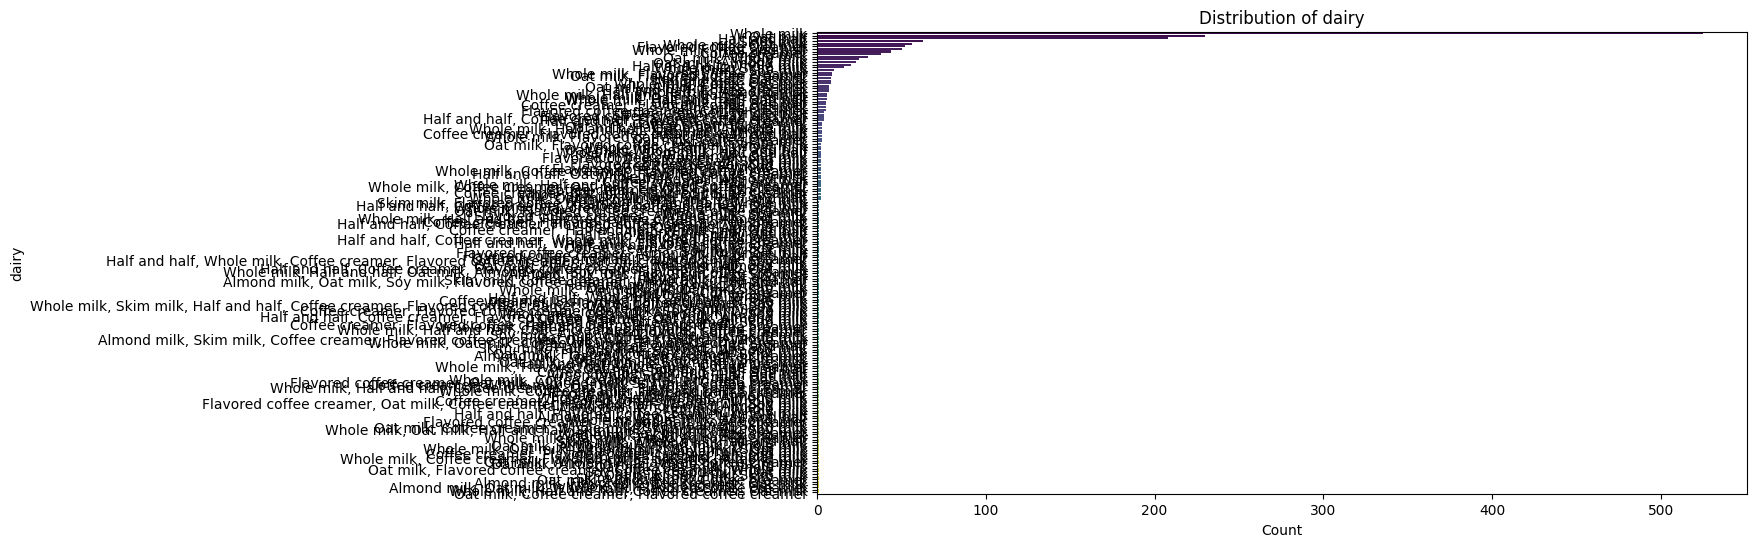

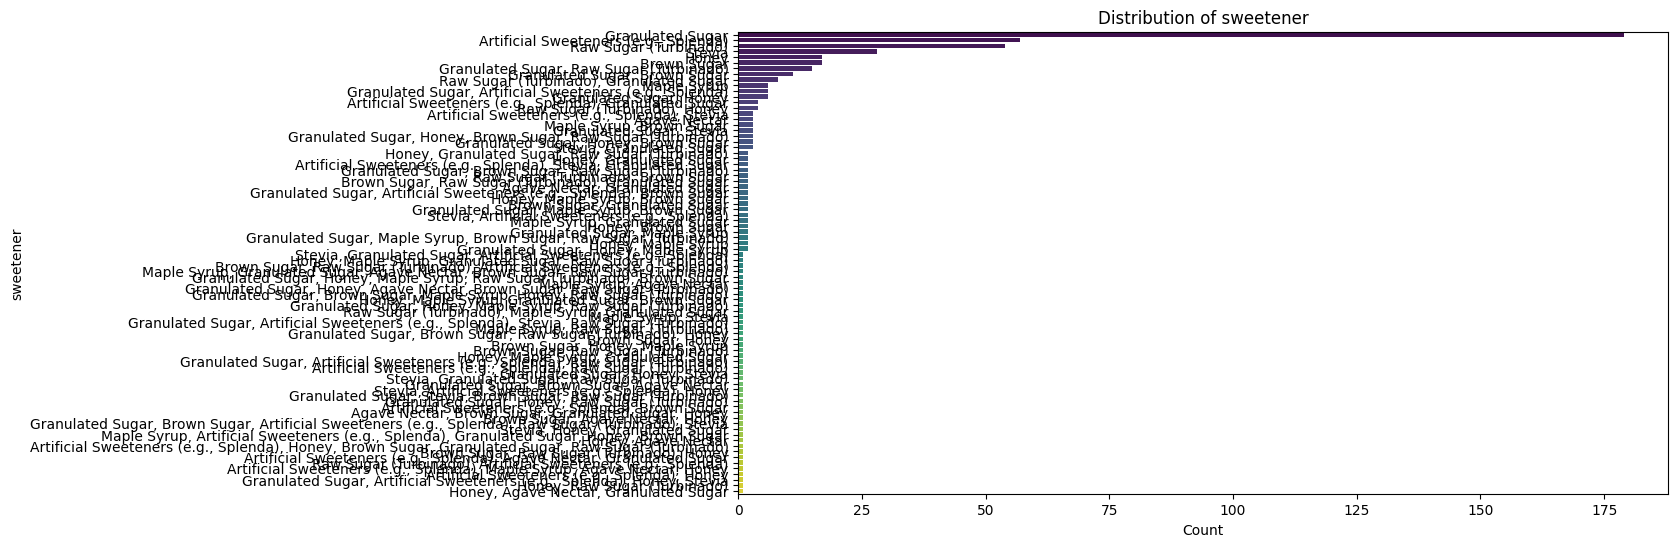

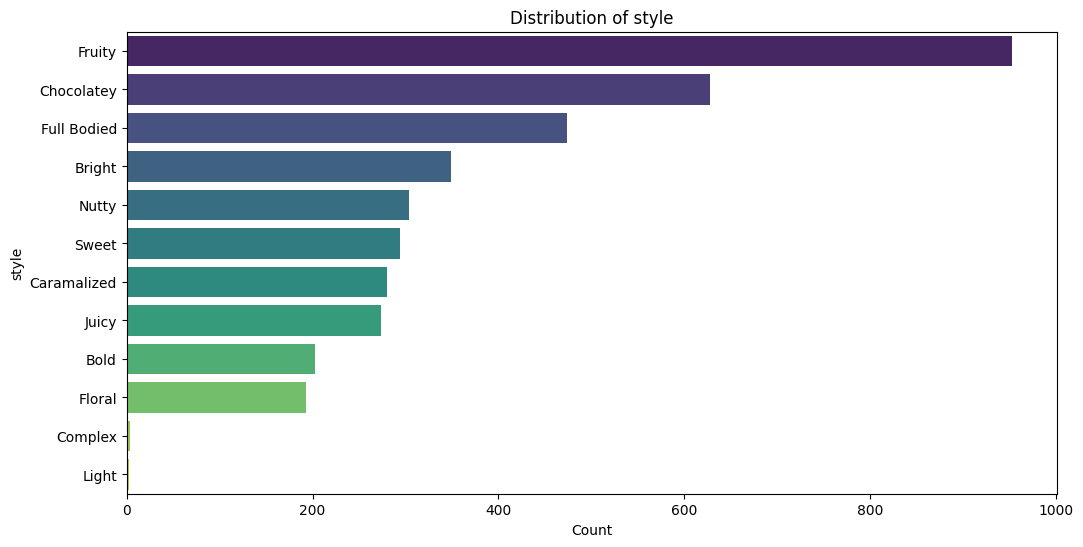

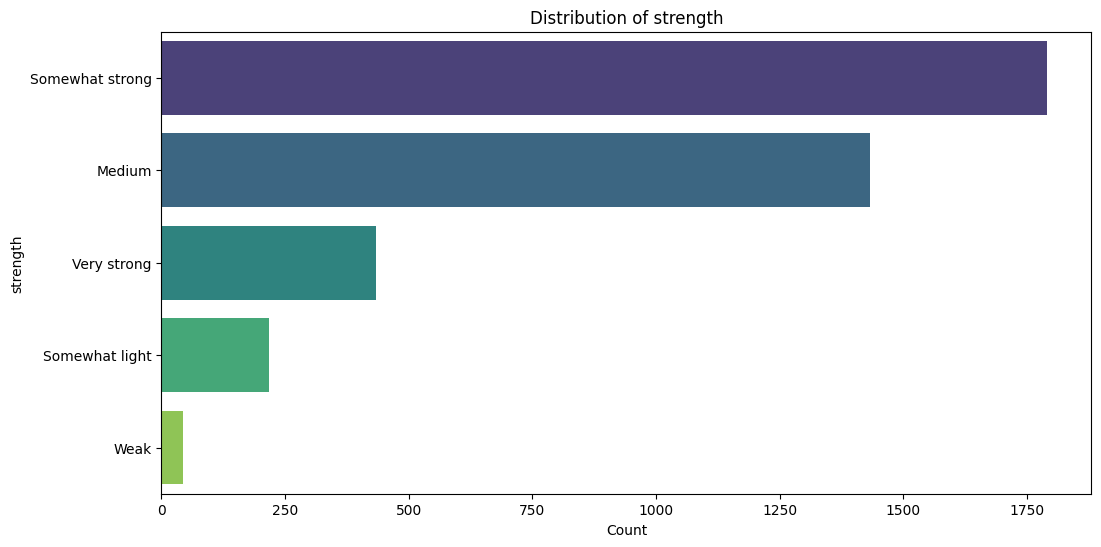

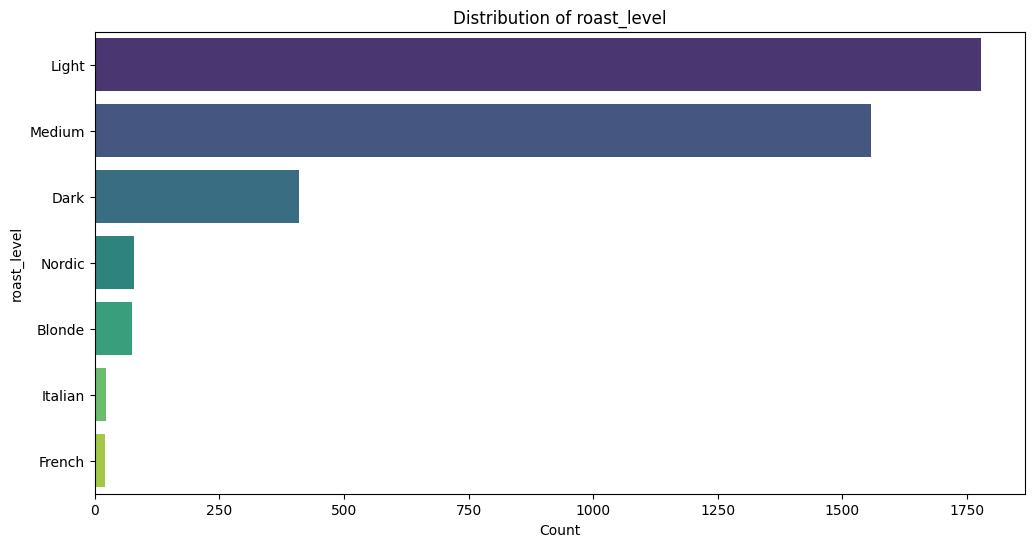

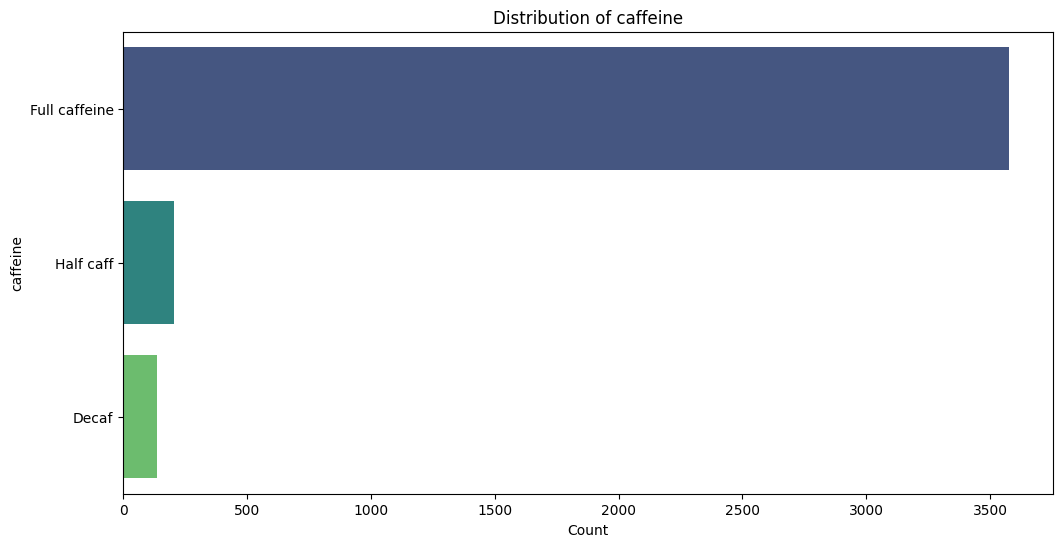

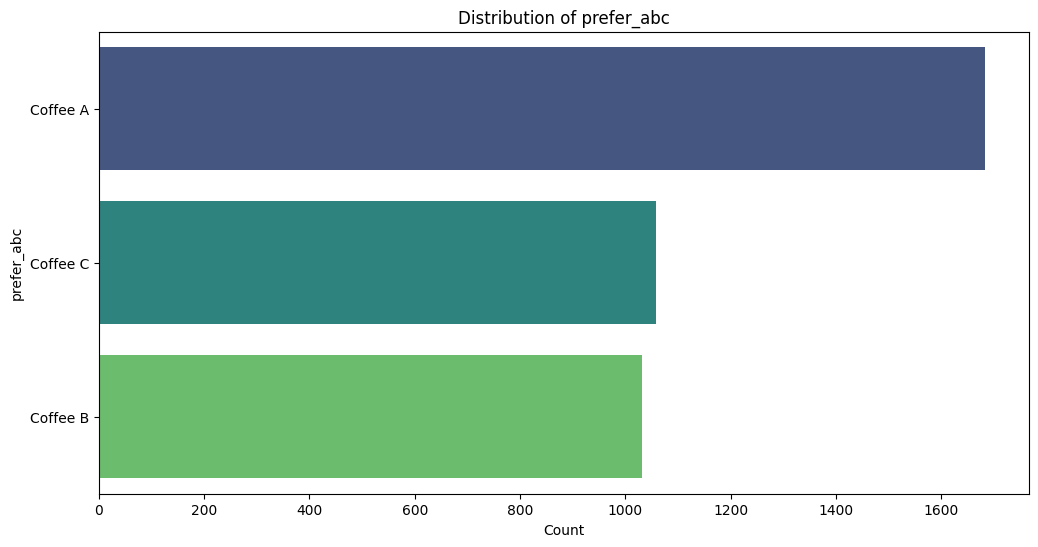

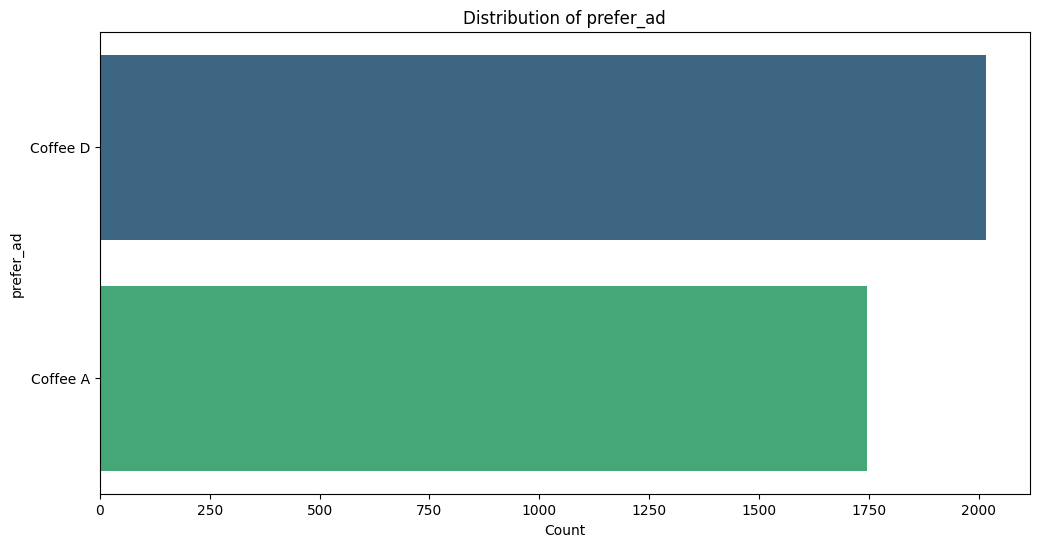

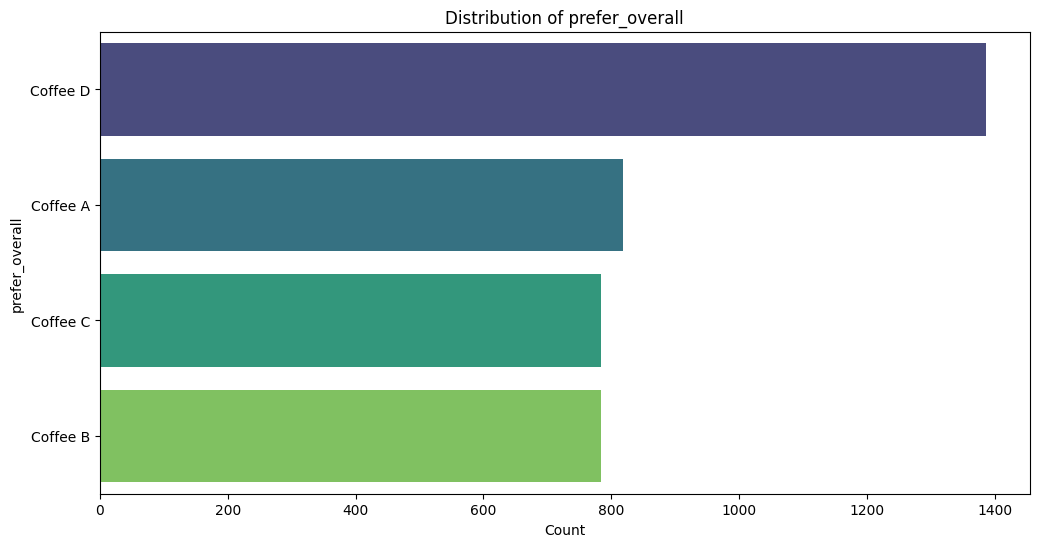

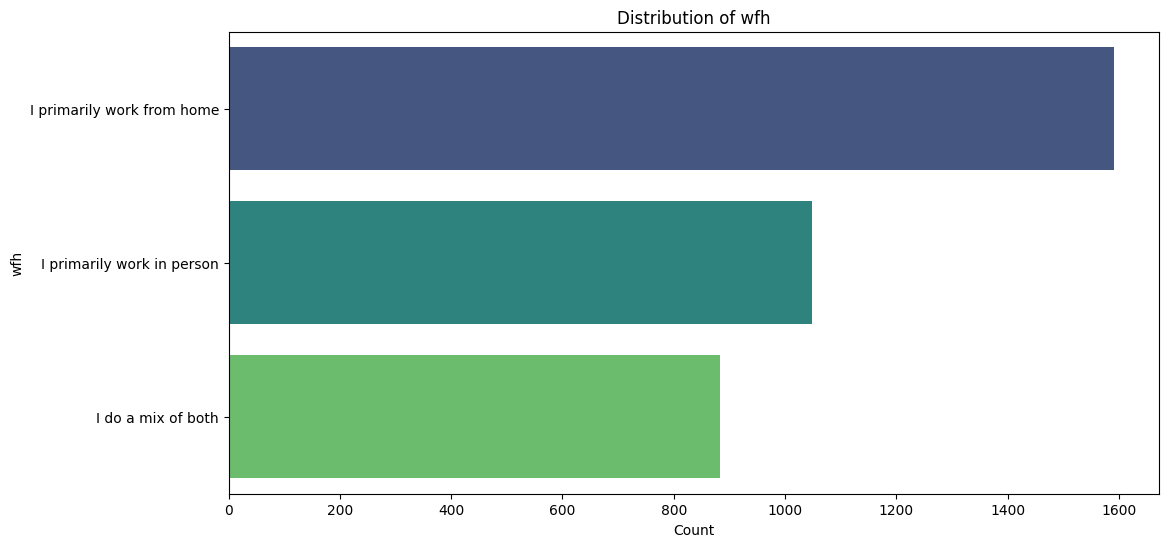

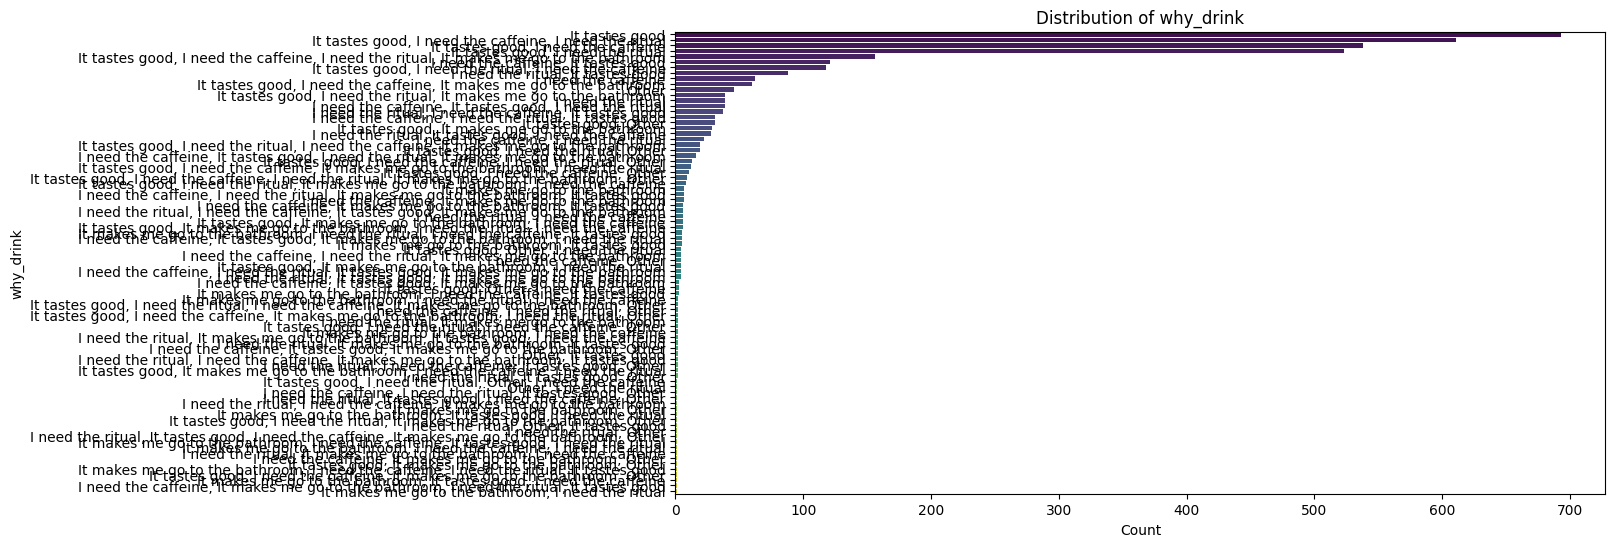

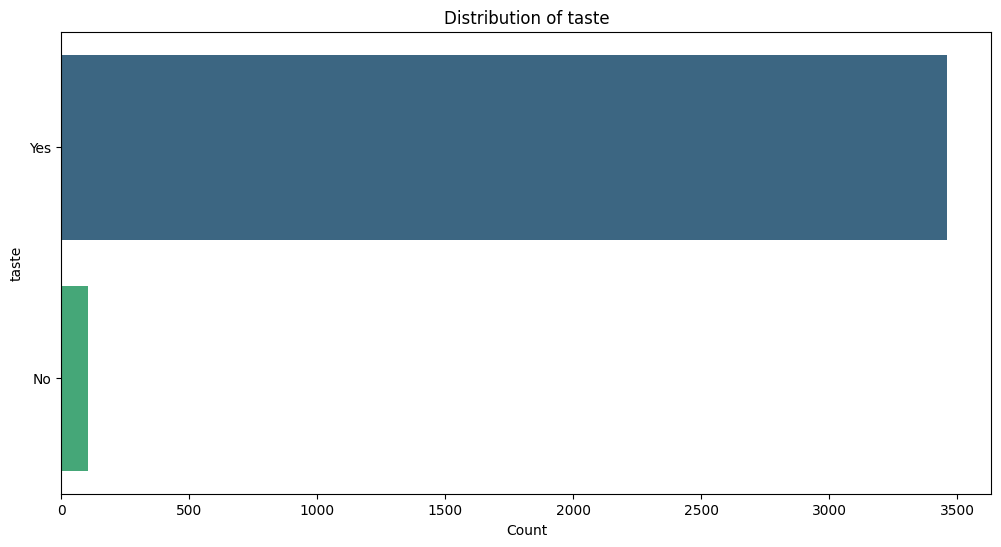

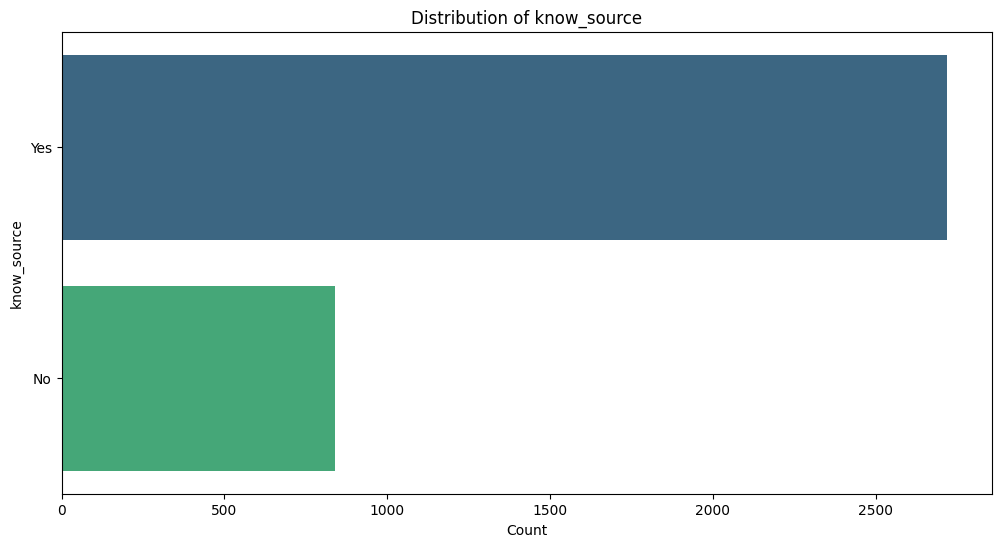

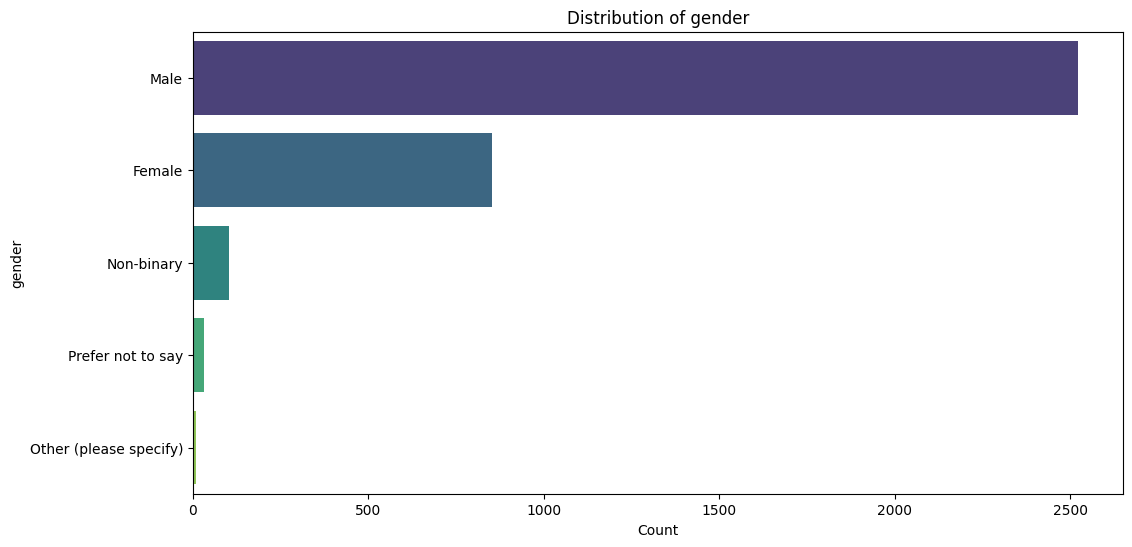

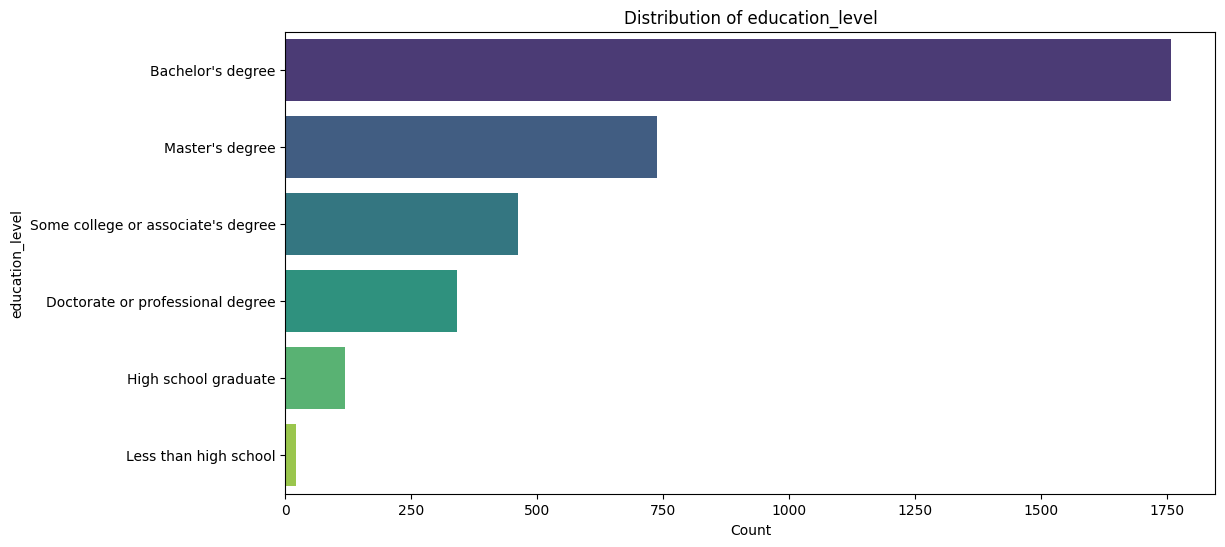

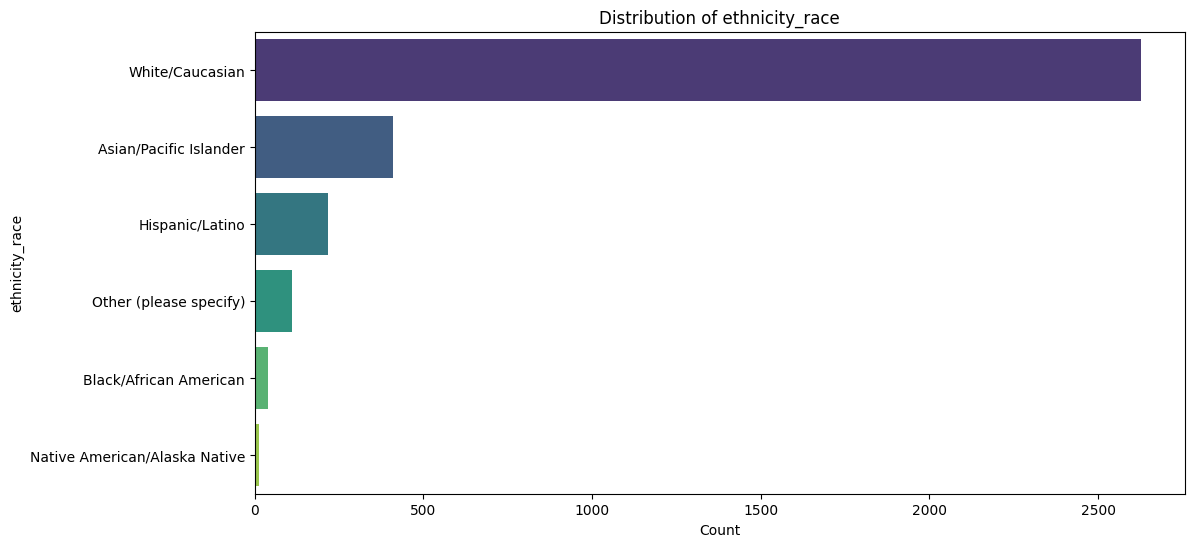

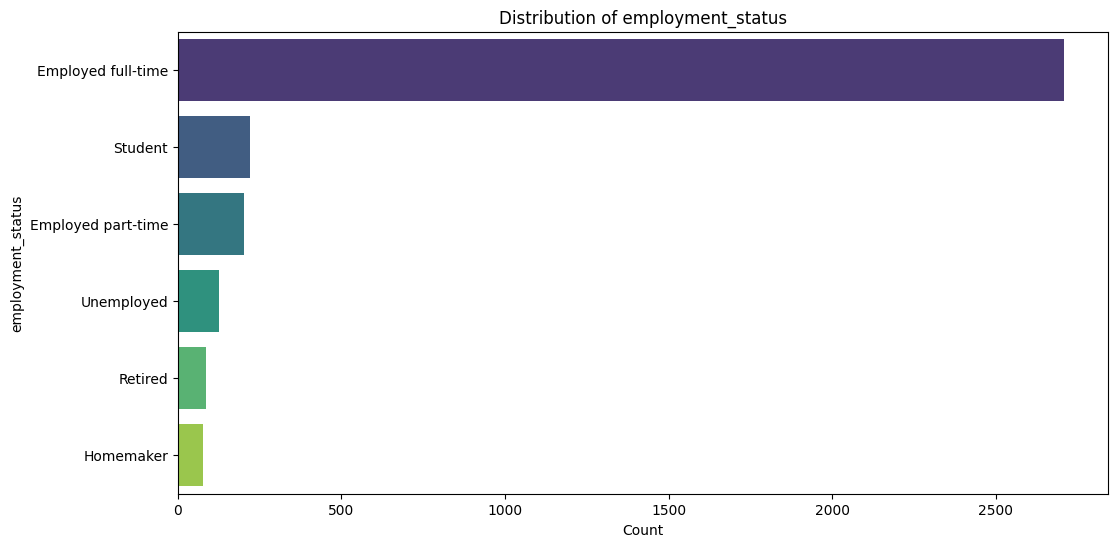

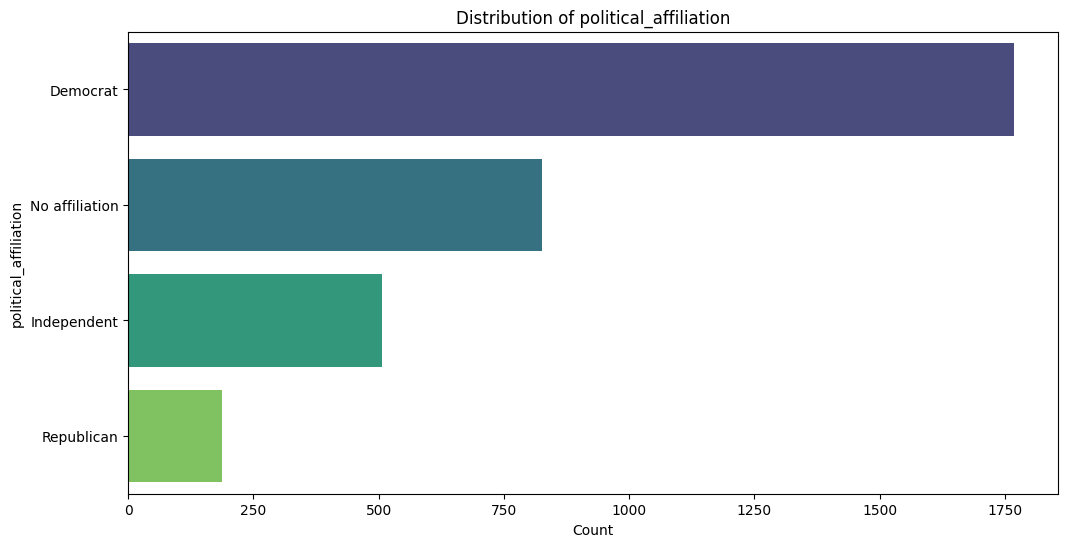

In [15]:
categorical_columns = ['where_drink', 'brew', 'purchase', 'favorite', 'additions', 'dairy', 
                       'sweetener', 'style', 'strength', 'roast_level', 'caffeine', 'prefer_abc', 
                       'prefer_ad', 'prefer_overall', 'wfh', 'why_drink', 'taste', 'know_source', 
                       'gender', 'education_level', 'ethnicity_race', 'employment_status', 
                       'political_affiliation']

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

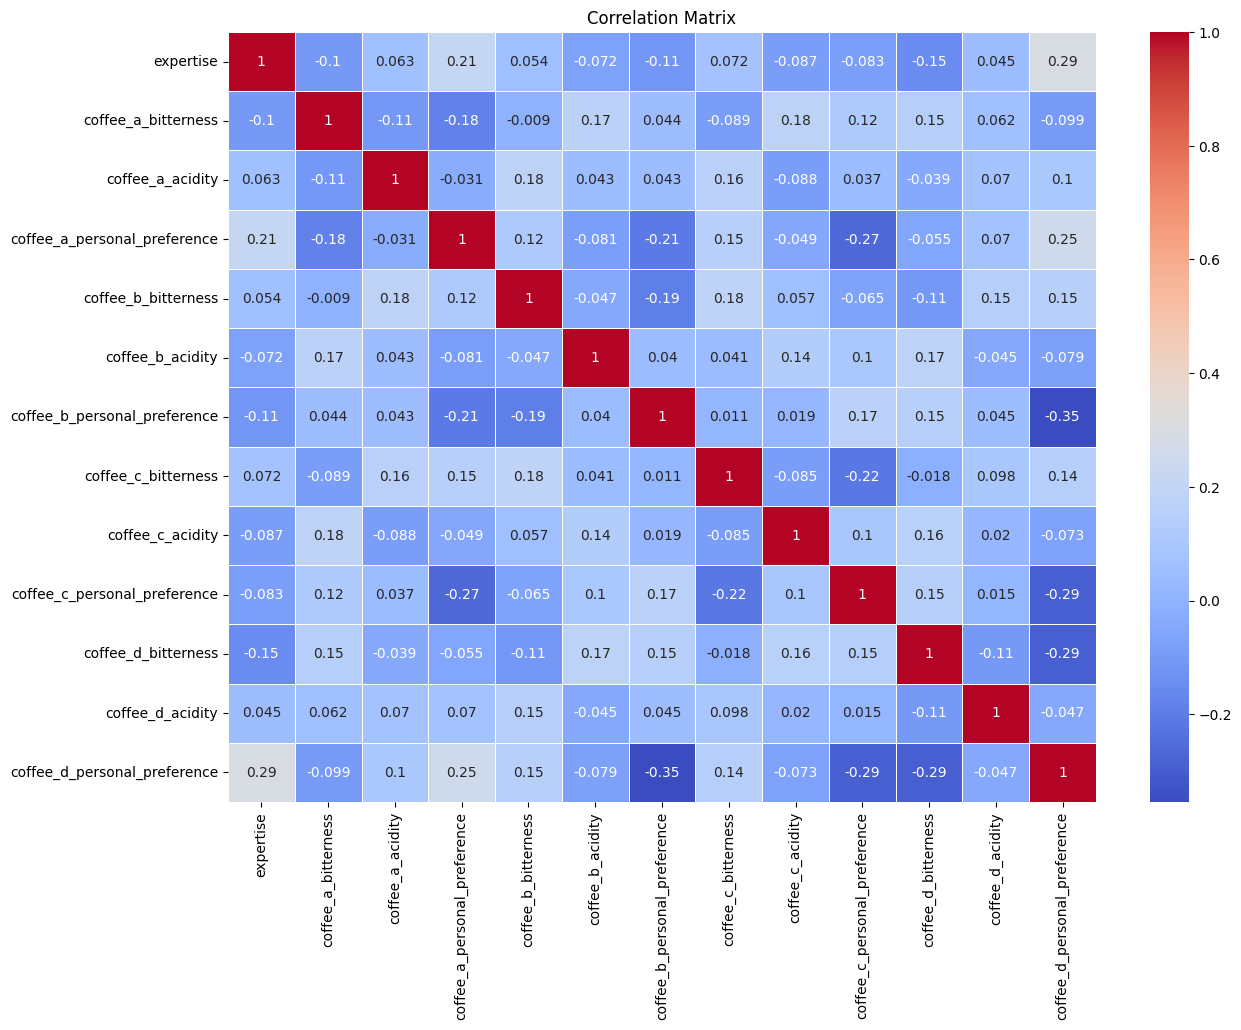

In [16]:
numerical_columns = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

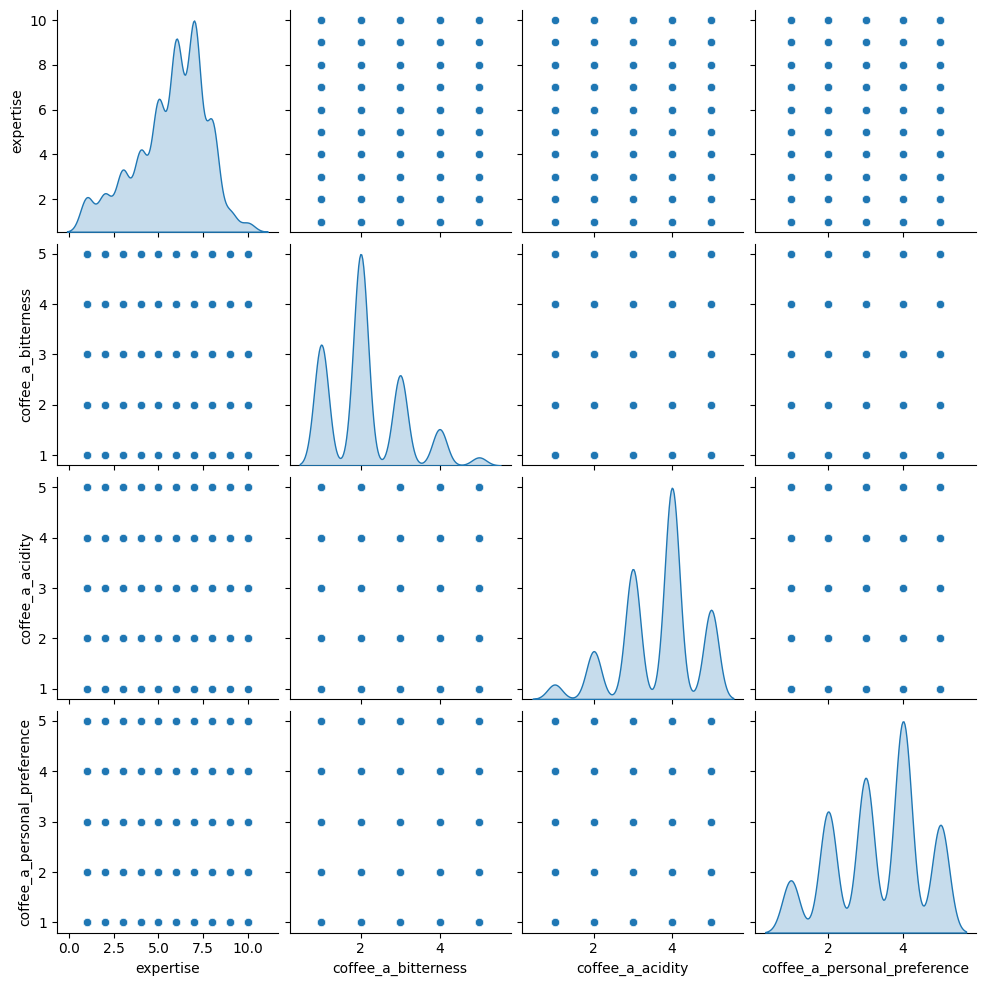

In [17]:
sns.pairplot(df, vars=['expertise', 'coffee_a_bitterness', 'coffee_a_acidity', 
                         'coffee_a_personal_preference'], kind='scatter', diag_kind='kde')
plt.show()